# The Battle of Neighbourhoods

## Table of Contents
#### 1. Introduction
#### 2. Data Sources
#### 3. Methodology
#### 4. Results
#### 5. Discussion
#### 6. Conclusions

## 1. Introduction

##### I own a botique of handmade accessories and cloths in Italy. Recently I moved to Sydney and I am planning to open and expand my business here as well. My idea is not to open a "standard botique": I want to build a creative environment that combines handmade fashion clothes and accessories from young and international artisans offering to the clients the opportunity to taste Italian coffee and simple traditional food specialties. I want to create a space not only for customers to buy, but I want to offer them an environment where I will organize cooking, tailor and design workshops enhancing their creativity . To make my project realistic, I want to be sure of which neihgbourhood could be the best option to have more customers. After making my research to analyze various possibilities, I will show the obtained results and my presentation to eventual business partners. 

## 2. Data Sources

##### -List of the neighbourhood in Sydney will be taken from : https://www.intosydneydirectory.com.au/sydney-postcodes.php

##### -Data regarding the boutiques and the caffee in Sydney will be extracted using Foursquare

##### - Geocode informations from Geopy

## 3. Methodology
##### - From the neighbourhoods of Sydney, some interesting ones will be chosen
##### - The venues ( botiques and cafes) in the interesting neighboorhoods will be analysed
##### - Some aspects will be analyze to decide which is the best neighbourhood for the new business

### Importing Libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from IPython.display import Image 
from IPython.core.display import HTML 
from pandas.io.json import json_normalize # tranforming json file into a pandas dataframe library
import folium # map rendering library
import json
import requests # library to handle requests
from pandas.io.json import json_normalize
!pip install geopy 
from geopy.geocoders import Nominatim
!pip install lxml

In [2]:
path='https://www.intosydneydirectory.com.au/sydney-postcodes.php'

In [3]:
df_NSW=pd.read_html(path, header=None)

In [4]:
df_NSW=df_NSW[1]

In [5]:
df_NSW

,0,1,2
0,Abbotsbury,NSW,2176
1,Abbotsford,NSW,2046
2,Agnes Banks,NSW,2753
3,Airds,NSW,2560
4,Alexandria,NSW,2015
...,...,...,...
684,Yarrawarrah,NSW,2233
685,Yellow Rock,NSW,2777
686,Yennora,NSW,2161
687,Yowie Bay,NSW,2228


In [6]:
df_NSW.columns = ["Suburb", "Region", "Postal code"]

In [7]:
del df_NSW["Region"]

In [8]:
df_NSW

,Suburb,Postal code
0,Abbotsbury,2176
1,Abbotsford,2046
2,Agnes Banks,2753
3,Airds,2560
4,Alexandria,2015
...,...,...
684,Yarrawarrah,2233
685,Yellow Rock,2777
686,Yennora,2161
687,Yowie Bay,2228


In [9]:
df_NSW.shape

(689, 2)

#### Selecting Neighbourhoods that could be interesting to start a new business

##### Living in Sydney since few months, I had the opportunity of exploring the city, and to decide which neighbourhoods I could consider as interesting to open my business: Redfern,Paddinghton,Surry Hills,Bondi,Manly,Bronte and Newtown.

In [10]:
Interesting_Neighbourhoods=df_NSW.loc[df_NSW['Suburb'].isin(['Redfern','Paddington','Surry Hills','Bondi','MAnly','Bronte','Newtown'])]

In [11]:
Interesting_Neighbourhoods

,Suburb,Postal code
79,Bondi,2026
95,Bronte,2024
453,Newtown,2042
485,Paddington,2021
528,Redfern,2016
597,Surry Hills,2010


##### Find the coordinates of the Interesting Neighbourhoods and checking which ones have more venues 


In [12]:
address_Bondi = 'Bondi, Sydney'

geolocator = Nominatim(user_agent="syd_explorer")
location_Bondi = geolocator.geocode(address_Bondi)
latitude_Bondi = location_Bondi.latitude
longitude_Bondi = location_Bondi.longitude
print('The geograpical coordinate of Bondi are {}, {}.'.format(latitude_Bondi, longitude_Bondi))

The geograpical coordinate of Bondi are -33.8930556, 151.2633333.


In [13]:
address_Bronte = 'Bronte, Sydney'

geolocator = Nominatim(user_agent="syd_explorer")
location_Bronte = geolocator.geocode(address_Bronte)
latitude_Bronte = location_Bronte.latitude
longitude_Bronte = location_Bronte.longitude
print('The geograpical coordinate of Bronte are {}, {}.'.format(latitude_Bronte, longitude_Bronte))

The geograpical coordinate of Bronte are -33.9042128, 151.2637774.


In [14]:
address_Newtown = 'Newtown, Australia'

geolocator = Nominatim(user_agent="syd_explorer")
location_Newtown = geolocator.geocode(address_Newtown)
latitude_Newtown = location_Newtown.latitude
longitude_Newtown = location_Newtown.longitude
print('The geograpical coordinate of Newtown are {}, {}.'.format(latitude_Newtown, longitude_Newtown))

The geograpical coordinate of Newtown are -33.8961132, 151.1801893.


In [15]:
address_Paddington = 'Paddington, Australia'

geolocator = Nominatim(user_agent="syd_explorer")
location_Paddington = geolocator.geocode(address_Paddington)
latitude_Paddington = location_Paddington.latitude
longitude_Paddington = location_Paddington.longitude
print('The geograpical coordinate of Paddington are {}, {}.'.format(latitude_Paddington, longitude_Paddington))

The geograpical coordinate of Paddington are -33.8841572, 151.2272766.


In [16]:
address_Redfern = 'Redfern, Australia'

geolocator = Nominatim(user_agent="syd_explorer")
location_Redfern = geolocator.geocode(address_Redfern)
latitude_Redfern = location_Redfern.latitude
longitude_Redfern = location_Redfern.longitude
print('The geograpical coordinate of Redfern are {}, {}.'.format(latitude_Redfern, longitude_Redfern))


The geograpical coordinate of Redfern are -33.8931044, 151.2040292.


In [17]:
address_Surry_Hills = 'Surry Hills, Australia'

geolocator = Nominatim(user_agent="syd_explorer")
location_Surry_Hills = geolocator.geocode(address_Surry_Hills)
latitude_Surry_Hills = location_Surry_Hills.latitude
longitude_Surry_Hills = location_Surry_Hills.longitude
print('The geograpical coordinate of Surry Hills are {}, {}.'.format(latitude_Surry_Hills, longitude_Surry_Hills))

The geograpical coordinate of Surry Hills are -33.8845123, 151.2100301.


#### Creating a new dataframe with the suburbs and their coordinates

In [18]:
d= {'Suburb': ['Bondi','Bronte', 'Newtown','Paddington','Redfern','Surry Hills'],'Latitude':[latitude_Bondi,latitude_Bronte,
                                                                                               latitude_Newtown,latitude_Paddington,
                                                                                               latitude_Redfern,latitude_Surry_Hills],
      'Longitude':[longitude_Bondi,longitude_Bronte,longitude_Newtown,longitude_Paddington,longitude_Redfern,longitude_Surry_Hills]}


In [19]:
Suburbs = pd.DataFrame(data=d)
Suburbs

,Suburb,Latitude,Longitude
0,Bondi,-33.893056,151.263333
1,Bronte,-33.904213,151.263777
2,Newtown,-33.896113,151.180189
3,Paddington,-33.884157,151.227277
4,Redfern,-33.893104,151.204029
5,Surry Hills,-33.884512,151.210030


##### Creating a map of Sydney with the interesting Neighbourhoods 

In [20]:
address_Sydney= 'Sydney, Australia'

geolocator = Nominatim(user_agent="syd_explorer")
location_Sydney = geolocator.geocode(address_Sydney)
latitude_Sydney = location_Sydney.latitude
longitude_Sydney = location_Sydney.longitude
print('The geograpical coordinate of Sydney are {}, {}.'.format(latitude_Sydney, longitude_Sydney))


The geograpical coordinate of Sydney are -33.8548157, 151.2164539.


In [21]:
map_Sydney = folium.Map(location=[latitude_Sydney, longitude_Sydney], zoom_start=10)

# add markers to map
for lat, lng, sub, in zip(Suburbs['Latitude'], Suburbs['Longitude'], Suburbs['Suburb']):
    label = '{}'.format(sub)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Sydney)  
    
map_Sydney

##### Extracting from Foursquare the Botiques in the neighbourhoods of Sydney

##### Foursquares credential

In [22]:
CLIENT_ID = 'VQCVNTKRP0PA01ZIHNZDOJUNZFRKXUJANACW03QZMTAEIY5I' # your Foursquare ID
CLIENT_SECRET = 'G2E3D1W3VFHCRGZ25JSFPKRLSU0JBQ5MQQ2IG24IHUMAR2NW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT= 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VQCVNTKRP0PA01ZIHNZDOJUNZFRKXUJANACW03QZMTAEIY5I
CLIENT_SECRET:G2E3D1W3VFHCRGZ25JSFPKRLSU0JBQ5MQQ2IG24IHUMAR2NW


In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [24]:
Suburbs_venues = getNearbyVenues(names=Suburbs['Suburb'],
                                   latitudes=Suburbs['Latitude'],
                                   longitudes=Suburbs['Longitude']
                                  )


Bondi
Bronte
Newtown
Paddington
Redfern
Surry Hills


In [25]:
print(Suburbs_venues.shape)
Suburbs_venues.head()

(290, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bondi,-33.893056,151.263333,Bennett St Dairy,-33.893700,151.260630,Café
1,Bondi,-33.893056,151.263333,Ninety Nine Thai,-33.893538,151.261555,Thai Restaurant
2,Bondi,-33.893056,151.263333,Fat Rupert's,-33.894720,151.267440,Australian Restaurant
3,Bondi,-33.893056,151.263333,Waverley Park,-33.894037,151.258693,Park
4,Bondi,-33.893056,151.263333,Russkis Deli,-33.893804,151.262845,Deli / Bodega


In [26]:
Suburbs_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bondi,28,28,28,28,28,28
Bronte,20,20,20,20,20,20
Newtown,59,59,59,59,59,59
Paddington,51,51,51,51,51,51
Redfern,32,32,32,32,32,32
Surry Hills,100,100,100,100,100,100


##### It looks like Surry Hills is the most popular for venues. Let's have a look at cafes and botiques in this Neighbourhood:

In [27]:
category_id ='4bf58dd8d48988d143941735' #Foursquare ID cafes
category_id_shops = '4bf58dd8d48988d104951735' #ID Foursquare Botique

#### Surry Hills

In [28]:
radius = 600
LIMIT = 100

# Define the corresponding URL
url_Surry_Hills = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_Surry_Hills, longitude_Surry_Hills, VERSION, category_id, radius, LIMIT)

# Send the GET Request
results_Surry_Hills = requests.get(url_Surry_Hills).json()

# Get relevant part of JSON and transform it into a pandas dataframe
# assign relevant part of JSON to venues
venues_Surry_Hills = results_Surry_Hills['response']['venues']

# tranform venues into a dataframe
dataframe_Surry_Hills = json_normalize(venues_Surry_Hills)
dataframe_Surry_Hills.head()

# keep only columns that include venue name, and anything that is associated with location
filtered_columns_Surry_Hills = ['name', 'categories'] + [col for col in dataframe_Surry_Hills.columns if col.startswith('location.')] + ['id']
dataframe_filtered_Surry_Hills = dataframe_Surry_Hills.loc[:, filtered_columns_Surry_Hills]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered_Surry_Hills['categories'] = dataframe_filtered_Surry_Hills.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_Surry_Hills.columns = [column.split('.')[-1] for column in dataframe_filtered_Surry_Hills.columns]

dataframe_filtered_Surry_Hills.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Cup Space Cafe,Café,50-52 Foveaux Street,-33.884348,151.210805,"[{'label': 'display', 'lat': -33.884348, 'lng'...",73,2010,AU,Surry Hills,NSW,Australia,"[50-52 Foveaux Street, Surry Hills NSW 2010, A...",NaN,5dd9ef2b3c398200073d1d70
1,White Taro Cafe,Breakfast Spot,Albion St,-33.882986,151.211298,"[{'label': 'display', 'lat': -33.8829862579391...",206,2010,AU,Surry Hills,NSW,Australia,"[Albion St (Belmore St), Surry Hills NSW 2010,...",Belmore St,5611a230498e6ed2e1a07786
2,Orto Trading Co.,Café,38 Waterloo St.,-33.886643,151.210335,"[{'label': 'display', 'lat': -33.8866434456536...",238,2010,AU,Surry Hills,NSW,Australia,"[38 Waterloo St. (Cooper St.), Surry Hills NSW...",Cooper St.,4dae1b988154d1d488601fff
3,Haven,Café,30-34 Chalmers Street,-33.884784,151.207153,"[{'label': 'display', 'lat': -33.8847835795422...",267,2010,AU,Surry Hills,NSW,Australia,"[30-34 Chalmers Street, Surry Hills NSW 2010, ...",NaN,54e2d956498eee7bd09d24dd
4,Rise At Rydges,Breakfast Spot,Albion St,-33.881865,151.209337,"[{'label': 'display', 'lat': -33.881865, 'lng'...",301,2010,AU,Surry Hills,NSW,Australia,"[Albion St, Surry Hills NSW 2010, Australia]",NaN,5a84a3a495d9862de687612e


In [29]:
radius = 600
LIMIT = 100

# Define the corresponding URL
url_Surry_Hills_shops = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_Surry_Hills, longitude_Surry_Hills, VERSION, category_id_shops, radius, LIMIT)

# Send the GET Request
results_Surry_Hills_shops = requests.get(url_Surry_Hills_shops).json()

# Get relevant part of JSON and transform it into a pandas dataframe
# assign relevant part of JSON to venues
venues_Surry_Hills_shops = results_Surry_Hills_shops['response']['venues']

# tranform venues into a dataframe
dataframe_Surry_Hills_shops = json_normalize(venues_Surry_Hills_shops)
dataframe_Surry_Hills_shops.head()

# keep only columns that include venue name, and anything that is associated with location
filtered_columns_Surry_Hills_shops = ['name', 'categories'] + [col for col in dataframe_Surry_Hills_shops.columns if col.startswith('location.')] + ['id']
dataframe_filtered_Surry_Hills_shops = dataframe_Surry_Hills_shops.loc[:, filtered_columns_Surry_Hills_shops]

# filter the category for each row
dataframe_filtered_Surry_Hills_shops['categories'] = dataframe_filtered_Surry_Hills_shops.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_Surry_Hills_shops.columns = [column.split('.')[-1] for column in dataframe_filtered_Surry_Hills_shops.columns]

dataframe_filtered_Surry_Hills_shops.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,crossStreet,neighborhood,id
0,Clever Ain't Wise,Boutique,Shop 11 East Village Shopping Centre Defries A...,-33.885058,151.207851,"[{'label': 'display', 'lat': -33.8850584752891...",210,AU,Zetland,NSW,Australia,[Shop 11 East Village Shopping Centre Defries ...,NaN,NaN,NaN,545b2be7498e51179c14d51b
1,Elms,Boutique,388-394 Crown Street,-33.883787,151.214171,"[{'label': 'display', 'lat': -33.883787, 'lng'...",391,AU,Surry Hills,NSW,Australia,"[388-394 Crown Street, Surry Hills NSW 2010, A...",2010,NaN,NaN,5c7e6548b8fd9d002c2edd52
2,Fashion Easy,Boutique,"Suite 801, Level 8, 28-36",-33.883921,151.209851,"[{'label': 'display', 'lat': -33.8839208771648...",67,AU,Surry Hills,NSW,Australia,"[Suite 801, Level 8, 28-36 (Foveax Street), Su...",2010,Foveax Street,NaN,4df07279fa76042fed6e6e62
3,C's Flashback,Clothing Store,314 Crown St,-33.880699,151.215016,"[{'label': 'display', 'lat': -33.8806993955441...",626,AU,Darlinghurst,NSW,Australia,"[314 Crown St, Darlinghurst NSW 2010, Australia]",2010,NaN,NaN,4bf0c5d221072d7f115c208b
4,Black Blaze,Boutique,336 Crown Street,-33.881420,151.215020,"[{'label': 'display', 'lat': -33.88142, 'lng':...",575,AU,Surry Hills,NSW,Australia,"[336 Crown Street, Surry Hills NSW 2010, Austr...",2010,NaN,NaN,5b5420070a08ab002cd7e1b3


In [30]:
map_Botique = folium.Map(location=[latitude_Surry_Hills, longitude_Surry_Hills], zoom_start=10)

# add markers to map
for lat, lng, name,categories in zip(dataframe_filtered_Surry_Hills['lat'], dataframe_filtered_Surry_Hills['lng'], dataframe_filtered_Surry_Hills['name'],dataframe_filtered_Surry_Hills['categories']):
    label = '{},{}'.format(name,categories)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3192cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Botique)  
map_Botique    

##### Surry Hills looks like a perfect location to have a botique, the fact that there are already many others and a lot of cafes, it means that is great position to have a small business. But, there might be too many competitors around? Let's explore few neighbourhood snearby; they might be in a strategic positions without being surrounded from competitors. Let's investigate more the following suburbs: Redfern and Paddington

In [31]:
folium.features.CircleMarker(
    [latitude_Redfern, longitude_Redfern],
    radius=30,
    color='red',
    popup='Redfern',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(map_Botique)


folium.features.CircleMarker(
    [latitude_Paddington, longitude_Paddington],
    radius=30,
    color='green',
    popup='Paddington',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.6
).add_to(map_Botique)

map_Botique

In [32]:
radius_Redfern = 600
LIMIT_Redfern = 100

# Define the corresponding URL
url_Redfern = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_Redfern, longitude_Redfern, VERSION, category_id, radius_Redfern, LIMIT_Redfern)

# Send the GET Request
results_Redfern = requests.get(url_Redfern).json()

# Get relevant part of JSON and transform it into a pandas dataframe
# assign relevant part of JSON to venues
venues_Redfern = results_Redfern['response']['venues']

# tranform venues into a dataframe
dataframe_Redfern = json_normalize(venues_Redfern)
dataframe_Redfern.head()

# keep only columns that include venue name, and anything that is associated with location
filtered_columns_Redfern= ['name', 'categories'] + [col for col in dataframe_Redfern.columns if col.startswith('location.')] + ['id']
dataframe_filtered_Redfern = dataframe_Redfern.loc[:, filtered_columns_Redfern]
dataframe_filtered_Redfern.head()

# filter the category for each row
dataframe_filtered_Redfern['categories'] = dataframe_filtered_Redfern.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_Redfern.columns = [column.split('.')[-1] for column in dataframe_filtered_Redfern.columns]

dataframe_filtered_Redfern.head()


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Hunter's Corner,Café,89 Pitt St,at Redfern St.,-33.892809,151.204020,"[{'label': 'display', 'lat': -33.8928085860151...",32,2016,AU,Redfern,NSW,Australia,"[89 Pitt St (at Redfern St.), Redfern NSW 2016...",5572488d498e8b7fe82c3404
1,Baffi & Mo,Breakfast Spot,94 Redfern St.,NaN,-33.892905,151.204975,"[{'label': 'display', 'lat': -33.8929052013833...",90,2016,AU,Redfern,NSW,Australia,"[94 Redfern St., Redfern NSW 2016, Australia]",4b2bfb3df964a520fcbe24e3
2,Southside Charmers,Breakfast Spot,306 Chalmers Street,NaN,-33.892869,151.205625,"[{'label': 'display', 'lat': -33.892869, 'lng'...",149,2016,AU,Redfern,NSW,Australia,"[306 Chalmers Street, Redfern NSW 2016, Austra...",5cb1efb72be425002c221528
3,Fern St Eatery,Café,NaN,NaN,-33.892884,151.203666,"[{'label': 'display', 'lat': -33.892884, 'lng'...",41,2016,AU,Redfern,NSW,Australia,"[Redfern NSW 2016, Australia]",59921008ad17890f94265e00
4,Bondi Wholefoods,Breakfast Spot,517 - 527 Elizabeth St,Bedford Street,-33.888188,151.208104,"[{'label': 'display', 'lat': -33.8881880005380...",664,2010,AU,Surry Hills,NSW,Australia,"[517 - 527 Elizabeth St (Bedford Street), Surr...",56788f8a498e4e9a62d4db35


In [33]:
radius = 600
LIMIT = 100


# Define the corresponding URL
url_Redfern_shops = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_Redfern, longitude_Redfern, VERSION, category_id_shops, radius, LIMIT)

# Send the GET Request
results_Redfern_shops = requests.get(url_Redfern_shops).json()

# Get relevant part of JSON and transform it into a pandas dataframe
# assign relevant part of JSON to venues
venues_Redfern_shops = results_Redfern_shops['response']['venues']

# tranform venues into a dataframe
dataframe_Redfern_shops = json_normalize(venues_Redfern_shops)
dataframe_Redfern_shops.head()

# keep only columns that include venue name, and anything that is associated with location
filtered_columns_Redfern_shops = ['name', 'categories'] + [col for col in dataframe_Redfern_shops.columns if col.startswith('location.')] + ['id']
dataframe_filtered_Redfern_shops = dataframe_Redfern_shops.loc[:, filtered_columns_Redfern_shops]

# filter the category for each row
dataframe_filtered_Redfern_shops['categories'] = dataframe_filtered_Redfern_shops.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_Redfern_shops.columns = [column.split('.')[-1] for column in dataframe_filtered_Redfern_shops.columns]

dataframe_filtered_Redfern_shops.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,neighborhood,id
0,Queen Justine Vintage,Boutique,122 Regent Street,-33.892704,151.200470,"[{'label': 'display', 'lat': -33.8927040100097...",331,AU,Redfern,NSW,Australia,"[122 Regent Street, Redfern NSW, Australia]",NaN,NaN,50aaf238e4b00031cfd3c5af
1,Collezione Santina Haute Couture,Bridal Shop,167 Regent Street,-33.894171,151.199757,"[{'label': 'display', 'lat': -33.894171, 'lng'...",412,AU,Sydney,NSW,Australia,"[167 Regent Street, Sydney NSW 2016, Australia]",2016,Redfern,57903c81498e1a8289587e93
2,GUESS,Clothing Store,Pembroke St.,-33.888288,151.207090,"[{'label': 'display', 'lat': -33.888288, 'lng'...",606,AU,Surry Hills,NSW,Australia,"[Pembroke St., Surry Hills NSW 2010, Australia]",2010,NaN,4d0599012f96f04d6ee12354


In [34]:
radius_Paddington = 600
LIMIT_Paddington = 100

# Define the corresponding URL
url_Paddington = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_Paddington, longitude_Paddington, VERSION, category_id, radius_Paddington, LIMIT_Paddington)

# Send the GET Request
results_Paddington = requests.get(url_Paddington).json()

# Get relevant part of JSON and transform it into a pandas dataframe
# assign relevant part of JSON to venues
venues_Paddington = results_Paddington['response']['venues']

# tranform venues into a dataframe
dataframe_Paddington = json_normalize(venues_Paddington)
dataframe_Paddington.head()

# keep only columns that include venue name, and anything that is associated with location
filtered_columns_Paddington= ['name', 'categories'] + [col for col in dataframe_Paddington.columns if col.startswith('location.')] + ['id']
dataframe_filtered_Paddington = dataframe_Paddington.loc[:, filtered_columns_Paddington]
dataframe_filtered_Paddington.head()

# filter the category for each row
dataframe_filtered_Paddington['categories'] = dataframe_filtered_Paddington.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_Paddington.columns = [column.split('.')[-1] for column in dataframe_filtered_Paddington.columns]

dataframe_filtered_Paddington.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,id
0,tuk tuk,Breakfast Spot,Heeley St,-33.882543,151.228088,"[{'label': 'display', 'lat': -33.882543, 'lng'...",194,AU,Sydney,NSW,Australia,"[Heeley St, Sydney NSW, Australia]",NaN,52abb0fc498e2f266518e524
1,468,Breakfast Spot,468 Oxford Street,-33.888150,151.231910,"[{'label': 'display', 'lat': -33.88815, 'lng':...",617,AU,Sydney,NSW,Australia,"[468 Oxford Street, Sydney NSW 2025, Australia]",2025,5494b9eb498e91fedc3840bf
2,Piccadilly Cafe,Australian Restaurant,472 Oxford St,-33.888349,151.231807,"[{'label': 'display', 'lat': -33.8883489785043...",626,AU,Paddington,NSW,Australia,"[472 Oxford St, Paddington NSW 2021, Australia]",2021,4b0b3561f964a520ab2e23e3
3,Bills,Café,433 Liverpool St.,-33.878557,151.222733,"[{'label': 'display', 'lat': -33.8785565397401...",751,AU,Darlinghurst,NSW,Australia,"[433 Liverpool St., Darlinghurst NSW 2010, Aus...",2010,4b3699c5f964a520d93825e3
4,Blythe,Breakfast Spot,NaN,-33.882419,151.224241,"[{'label': 'display', 'lat': -33.882419, 'lng'...",340,AU,Darlinghurst,NSW,Australia,"[Darlinghurst NSW, Australia]",NaN,4e8a31b1b8f7b56256777da8


In [35]:
radius = 600
LIMIT = 100

# Define the corresponding URL
url_Paddington_shops = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_Paddington, longitude_Paddington, VERSION, category_id_shops, radius, LIMIT)

# Send the GET Request
results_Paddington_shops = requests.get(url_Paddington_shops).json()

# Get relevant part of JSON and transform it into a pandas dataframe
# assign relevant part of JSON to venues
venues_Paddington_shops = results_Paddington_shops['response']['venues']

# tranform venues into a dataframe
dataframe_Paddington_shops = json_normalize(venues_Paddington_shops)
dataframe_Paddington_shops.head()

# keep only columns that include venue name, and anything that is associated with location
filtered_columns_Paddington_shops = ['name', 'categories'] + [col for col in dataframe_Paddington_shops.columns if col.startswith('location.')] + ['id']
dataframe_filtered_Paddington_shops = dataframe_Paddington_shops.loc[:, filtered_columns_Paddington_shops]

# filter the category for each row
dataframe_filtered_Paddington_shops['categories'] = dataframe_filtered_Paddington_shops.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_Paddington_shops.columns = [column.split('.')[-1] for column in dataframe_filtered_Paddington_shops.columns]

dataframe_filtered_Paddington_shops.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,crossStreet,id
0,Incu,Boutique,256 Oxford St.,-33.885115,151.227123,"[{'label': 'display', 'lat': -33.8851151503632...",107,AU,Sydney,NSW,Australia,"[256 Oxford St., Sydney NSW, Australia]",NaN,NaN,4b51225bf964a520264427e3
1,KOOKÄI,Women's Store,258 Oxford St.,-33.884863,151.225917,"[{'label': 'display', 'lat': -33.8848630843720...",148,AU,Paddington,NSW,Australia,"[258 Oxford St., Paddington NSW 2021, Australia]",2021,NaN,4eed1d49d3e3246bdaf63d3e
2,"Young Australian Designers Market, Paddington ...",Boutique,NaN,-33.885030,151.226163,"[{'label': 'display', 'lat': -33.88503, 'lng':...",141,AU,NaN,NaN,Australia,[Australia],NaN,NaN,4cddc8b8ffcf37049ed40d82
3,Hansen And Gretel,Boutique,NaN,-33.884987,151.226037,"[{'label': 'display', 'lat': -33.884987, 'lng'...",147,AU,Paddington,NSW,Australia,"[Paddington NSW 2021, Australia]",2021,NaN,59bb601a123a196ea4b7ce93
4,Parlour X,Boutique,261 Oxford St,-33.882414,151.227691,"[{'label': 'display', 'lat': -33.882414, 'lng'...",197,AU,Sydney,NSW,Australia,"[261 Oxford St, Sydney NSW 2021, Australia]",2021,NaN,4b05876ff964a520d99222e3


In [36]:
map_Botique = folium.Map(location=[latitude_Surry_Hills, longitude_Surry_Hills], zoom_start=10)

folium.features.CircleMarker(
    [latitude_Redfern, longitude_Redfern],
    radius=30,
    color='red',
    popup='Redfern',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(map_Botique)


folium.features.CircleMarker(
    [latitude_Paddington, longitude_Paddington],
    radius=30,
    color='green',
    popup='Paddington',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.6
).add_to(map_Botique)

# add markers to map
for lat, lng, name,categories in zip(dataframe_filtered_Surry_Hills['lat'], dataframe_filtered_Surry_Hills['lng'], dataframe_filtered_Surry_Hills['name'],dataframe_filtered_Surry_Hills['categories']):
    label = '{},{}'.format(name,categories)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3192cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Botique)  
    
for lat, lng, name,categories in zip(dataframe_filtered_Redfern['lat'], dataframe_filtered_Redfern['lng'], dataframe_filtered_Redfern['name'],dataframe_filtered_Redfern['categories']):
    label = '{},{}'.format(name,categories)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Botique)   
    
for lat, lng, name,categories in zip(dataframe_filtered_Redfern_shops['lat'], dataframe_filtered_Redfern_shops['lng'], dataframe_filtered_Redfern_shops['name'],dataframe_filtered_Redfern_shops['categories']):
    label = '{},{}'.format(name,categories)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='yellow',
        fill_opacity=1,
        parse_html=False).add_to(map_Botique)    
        
        
for lat, lng, name,categories in zip(dataframe_filtered_Surry_Hills_shops['lat'], dataframe_filtered_Surry_Hills_shops['lng'], dataframe_filtered_Surry_Hills_shops['name'], dataframe_filtered_Surry_Hills_shops['categories']):
    label = '{},{}'.format(name,categories)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='yellow',
        fill_opacity=1,
        parse_html=False).add_to(map_Botique)      
        
for lat, lng, name,categories in zip(dataframe_filtered_Paddington_shops['lat'], dataframe_filtered_Paddington_shops['lng'], dataframe_filtered_Paddington_shops['name'], dataframe_filtered_Paddington_shops['categories']):
    label = '{},{}'.format(name,categories)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='yellow',
        fill_opacity=1,
        parse_html=False).add_to(map_Botique)               
  
    
for lat, lng, name,categories in zip(dataframe_filtered_Paddington['lat'], dataframe_filtered_Paddington['lng'], dataframe_filtered_Paddington['name'], dataframe_filtered_Paddington['categories']):
    label = '{},{}'.format(name,categories)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Botique)  

map_Botique

##### Surry Hills looks more or less equally populated in botiques and cafes. 
##### Paddington is mainly populated from botiques.
##### Redfern has just few botiques and cafes
##### Surry Hills looks like a perfect place to open botique/cafe. But with all these venues already settled, for sure with would be a risk to open an activity with so many competitors nearby.
##### At this point,excluded Surry Hills from the possible neighbourhood, I made an extensive research online to compare the lifestyle Redfern with Paddington and find which one would fit better for my actyvity .
##### Paddington result to be more luxury and fashion orientated district. Furthermore, the prices to rent or buy a space are relatively high and the market trend over the years looks quite stable.
##### Redfern faced an impressive development during the past years, becoming really attractive and for young and dynamic professionals.Analyzing the market price for houses, the growth of Redfern will continue in the next years.




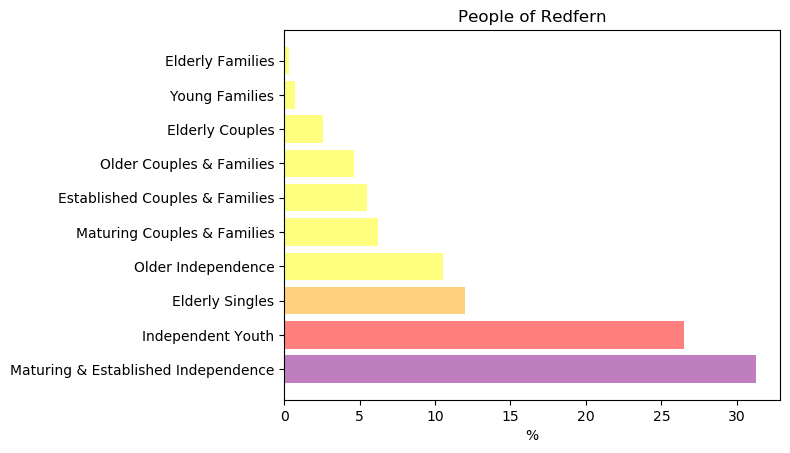

In [38]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Maturing & Established Independence', 'Independent Youth', 'Elderly Singles', 'Older Independence', 'Maturing Couples & Families', 'Established Couples & Families','Older Couples & Families','Elderly Couples','Young Families','Elderly Families')
y_pos = np.arange(len(objects))
people = [31.3,26.5,12,10.5,6.2,5.5,4.6,2.6,0.7,0.3]
colors=['purple','red','orange','yellow','yellow','yellow','yellow','yellow','yellow','yellow']
plt.barh(y_pos, people,color=colors, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('%')
plt.title('People of Redfern')

plt.show()
#sourced from Mosaic demographic data

### Conclusions

##### Redfern is on the rise, with new small coffees and shops on their way, I am confident that this suburb is the perfect  location to open my botique being still one of the first in the area and not one of the many in a small radius. Furthermore, the prices to buy the perfect place for my business, are at the moment lower than in Surry Hills and Paddington but will grow in value in the next years, giving me advantage in case one day I will sell my activity.